In [1]:
import netgen.gui
%gui tk
import netgen.meshing as msh
from ngsolve import *

In [2]:
m1d = msh.Mesh(dim=1)
n = 50
pids = [m1d.Add(msh.MeshPoint(msh.Pnt(i/n+1,0,0))) for i in range(n+1)]
for i in range(n):
    m1d.Add(msh.Element1D([pids[i],pids[i+1]],index=1))
m1d.Add (msh.Element0D( pids[0], index=1))
m1d.Add (msh.Element0D( pids[n], index=2))

# The periodic example adds point identification with type periodic.  
# We don't want to do that here. I'm not sure if we need any identifications here.
# I don't know how to see the identifications in Python

# m1d.AddPointIdentification(pids[0],pids[n],1,4) 
# takes two points, and identification number and a type
#    enum ID_TYPE { UNDEFINED = 1, PERIODIC = 2, CLOSESURFACES = 3, CLOSEEDGES = 4};
# from meshtype.hpp


In [3]:
mesh = Mesh(m1d)

In [4]:
fes = H1(mesh, order=1, dirichlet=[1,2])
fes.ndof


51

In [5]:
u = fes.TrialFunction()
v = fes.TestFunction()
gfu = GridFunction(fes)
f = CoefficientFunction(1)

a = BilinearForm(fes, symmetric=False)
a += SymbolicBFI(grad(u)*grad(v))
a.Assemble()

b = LinearForm(fes)
b += SymbolicLFI(f*v)
b.Assemble()


In [6]:
# this matrix is exactly the same as in Claes Johnson, except for the (0,0) and (50,50) entries
# these are 1/2 of the value calculated there.
# I think this is the correct matrix -- the boundary elements are not correctly integrated in the book.
print(a.mat)

Row 0:   0: 50   1: -50
Row 1:   0: -50   1: 100   2: -50
Row 2:   1: -50   2: 100   3: -50
Row 3:   2: -50   3: 100   4: -50
Row 4:   3: -50   4: 100   5: -50
Row 5:   4: -50   5: 100   6: -50
Row 6:   5: -50   6: 100   7: -50
Row 7:   6: -50   7: 100   8: -50
Row 8:   7: -50   8: 100   9: -50
Row 9:   8: -50   9: 100   10: -50
Row 10:   9: -50   10: 100   11: -50
Row 11:   10: -50   11: 100   12: -50
Row 12:   11: -50   12: 100   13: -50
Row 13:   12: -50   13: 100   14: -50
Row 14:   13: -50   14: 100   15: -50
Row 15:   14: -50   15: 100   16: -50
Row 16:   15: -50   16: 100   17: -50
Row 17:   16: -50   17: 100   18: -50
Row 18:   17: -50   18: 100   19: -50
Row 19:   18: -50   19: 100   20: -50
Row 20:   19: -50   20: 100   21: -50
Row 21:   20: -50   21: 100   22: -50
Row 22:   21: -50   22: 100   23: -50
Row 23:   22: -50   23: 100   24: -50
Row 24:   23: -50   24: 100   25: -50
Row 25:   24: -50   25: 100   26: -50
Row 26:   25: -50   26: 100   27: -50
Row 27:   26: -50   27: 

In [7]:
# this vector is exactly the same as in Claes Johnson, except for the first and last entries
# these are 1/2 of the value calculated there.
print(b.vec)

    0.01
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.02
    0.01




In [8]:
gfu.vec.data = a.mat.Inverse(freedofs=fes.FreeDofs())*b.vec

In [9]:
print(gfu.vec)

       0
  0.0098
  0.0192
  0.0282
  0.0368
   0.045
  0.0528
  0.0602
  0.0672
  0.0738
    0.08
  0.0858
  0.0912
  0.0962
  0.1008
   0.105
  0.1088
  0.1122
  0.1152
  0.1178
    0.12
  0.1218
  0.1232
  0.1242
  0.1248
   0.125
  0.1248
  0.1242
  0.1232
  0.1218
    0.12
  0.1178
  0.1152
  0.1122
  0.1088
   0.105
  0.1008
  0.0962
  0.0912
  0.0858
    0.08
  0.0738
  0.0672
  0.0602
  0.0528
   0.045
  0.0368
  0.0282
  0.0192
  0.0098
       0




In [10]:
Draw(gfu) # wasn't able to get this to work...
# I was able to use Mesh doctor to get the mesh to show.

In [11]:
import matplotlib.pyplot as plt
plt.plot(gfu.vec)

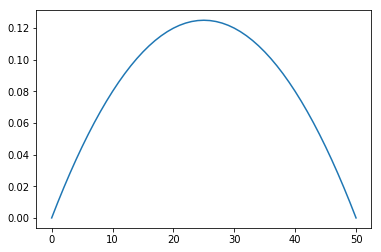

In [12]:
plt.show()